# $$\underline{Sod's \ shock \ tube}$$

## Introduction

Dans cet exercice, il nous est demandé de résoudre l'équation différentielle partielle couplée suivante:

$$\frac{\partial}{\partial t} \left[ \begin{array}{c} \rho \\ \rho u \\ \rho e_T  \end{array} \right]  + \frac{\partial}{\partial x} \left[ \begin{array}{c} \rho u \\ \rho u^2 + p \\ (\rho e_T + p) u \end{array} \right] =0$$

Nous verrons plus tard que ces vecteurs sont respectivements ${\mathbf{U}}$ et ${\mathbf{F}}$. 


In [61]:
import numpy                       # On importe les extensions comme dans les projets précédents
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Soient les conditions initiales du problèmes:

In [62]:
nx = 81      # Le nombre d'intervalle de longueur dx 
dx = .25     # La longueur d'un intervalle [m] 
dt = .0002   # Durée d'un intervalle de temps [s] 
gamma = 1.4  # Valeur du coefficient de Laplace pour un gaz parfait (trouvée dans l'énoncé) 
T=.01        # Durée étudiée [s] 
nt=int(T/dt) # Nombre d'intervalle de temps de durée dt (=50)

In [63]:
IC=numpy.empty((3,2*nx-1))    # Créons une matrice IC de 3 lignes et 2*nx-1 colonnes où nous plaçons les valeurs
for i in range (3):           # initiales du problèmes (1ère ligne est la densité en chaque point, la 2ème est
    if i == 0:                # la vitesse en chaque point et la 3ème est la pression en chaque point).
        l=1                   # Les valeurs initiales l et r sont respectivement les valeurs à gauche et à droite
        r=.125                # dans notre problème.
    if i == 1:
        l=0
        r=0
    if i == 2 :
        l=100000
        r=10000
    for k in range (nx):      # On remplit la matrice avec les valeurs de l et r pour chaque ligne.
        IC[i,k]=l
        IC[i,2*(nx-1)-k]=r
    

Notons que nous multiplions nx par deux pour que nous puissions utliser des indices 1/2. En effet, nous avons maintenant 2*nx pas de longueur dx = 0.125m.

D'apres les équations d'Euler, nous savons que les variables conservées sont:

\begin{equation}{\mathbf{U}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right](1)\end{equation}

où ρ est la densité rho, u est la vitesse et $$e_T$$ est l'énergie spécifique totale par unité de masse.
On a aussi que:

$$e_T = e+\frac{1}{2} u^2$$

et

$$e = e(\rho, p) = \frac{p}{(\gamma -1) \rho}$$

où p est la pression et γ est le coefficient de Laplace.

In [64]:
U = numpy.empty((3,2*nx-1))        # On initialise une matrice de trois lignes et 161 colonnes pour prendre
for i in range (3):                # les valeurs données par la relation (1) en chaque point de notre
    for k in range (2*nx-1):       # échelle d'espace.
        if i == 0:
            U[i,k]=IC[i,k]
        if i == 1:
            U[i,k]=IC[i-1,k]*IC[i,k]
        if i == 2:
            U[i,k]=(IC[i,k]/((gamma-1))+0.5*IC[i-2,k]*(IC[i-1,k]**2))

            

Nous savons également que le vecteur de flux est défini par:

\begin{equation}{\mathbf{F}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
(2)\end{equation}

Cela nous permet de définir une matrice F reprenant les valeurs initiales de l'exercice.

In [65]:
F=numpy.empty((3,2*nx-1))       # On initialise une matrice comme pour U et la remplissons des valeurs données
for i in range(3):              # par la relation (2) en chaque point de notre échelle d'espace. 
    for k in range (2*nx-1):
        if i == 0:
            F[i,k]=U[i+1,k]
        if i == 1:
            F[i,k]=((U[i,k]**2)/U[i-1,k]) + (gamma - 1)*(U[i+1,k] - 0.5*((U[i,k]**2)/U[i-1,k]))
        if i == 2: 
            F[i,k]=(U[i,k] + (gamma - 1)*(U[i,k] - 0.5*((U[i-1,k]**2)/U[i-2,k])))*(U[i-1,k]/U[i-2,k])



## The Richtmyer Method

 Nous appliquons ensuite les relations suivantes que nous répetons nt (=50) fois pour avoir les résultats à l'instant demandé.
 
 $$\begin{align}
{\mathbf{U}}^{n+\frac{1}{2}}_{k+\frac{1}{2}} &= \frac{1}{2} \left( {\mathbf{U}}^n_{k+1} + {\mathbf{U}}^n_k \right) - 
\frac{\Delta t}{2 \Delta x} \left( {\mathbf{F}}^n_{k+1} - {\mathbf{F}}^n_k\right)(3) \\
{\mathbf{U}}^{n+1}_k &= {\mathbf{U}}^n_k - \frac{\Delta t}{\Delta x} \left({\mathbf{F}}^{n+\frac{1}{2}}_{k+\frac{1}{2}} - {\mathbf{F}}^{n+\frac{1}{2}}_{k-\frac{1}{2}} \right)(4)
\end{align}$$

In [66]:
for n in range (nt):    
    for i in range (3): # On utilise la formule (3) pour les trois lignes et les 161 colonnes de la matrice U,
                        # on itère par pas de 2 car dans notre code "+1" est égal à "+1/2" dans la formule
        for k in range(0,2*(nx-1),2): 
            U[i,k+1]=(0.5*(U[i,k+2]+U[i,k]))-(dt/(2*dx))*(F[i,k+2]-F[i,k])
            
    for i in range(3):  # Avec les nouvelles valeurs de U, on remplit la matrice F par les relations précédentes
        for k in range (0,2*(nx-1),2):
            if i == 0:
                F[i,k+1]=U[i+1,k+1]
            if i == 1:
                F[i,k+1]=(U[i,k+1]**2/U[i-1,k+1]) + (gamma-1)*(U[i+1,k+1] - 0.5*(U[i,k+1]**2/U[i-1,k+1]))
            if i == 2: 
                F[i,k+1]=(U[i,k+1] + (gamma - 1)*(U[i,k+1] - 0.5*((U[i-1,k+1]**2)/U[i-2,k+1])))*(U[i-1,k+1]/U[i-2,k+1])
    
    for i in range (3): # Nous utilisons à présent la formule (3) 
        for k in range (2,2*(nx-1),2):
            U[i,k]=U[i,k]-(dt/dx)*(F[i,k+1]-F[i,k-1])
    
    for i in range (3):
        for k in range (0,2*nx-1,2):
            if i == 0:
                F[i,k]=U[i+1,k]
            if i == 1:
                F[i,k]=((U[i,k]**2)/U[i-1,k]) + (gamma - 1)*(U[i+1,k] - 0.5*((U[i,k]**2)/U[i-1,k]))
            if i == 2: 
                F[i,k]=(U[i,k] + (gamma - 1)*(U[i,k] - 0.5*((U[i-1,k]**2)/U[i-2,k])))*(U[i-1,k]/U[i-2,k])

            

## Simulation Results

Le milieu du tube étant l'origine de l'axe x et la longueur étudiée étant de 20 mètres, on sait que l'indice n correspondant à x = 2.5m est k = (2.5+10)/0.125 (Où le +10 vient du fait que notre axe commence à -10 et le /0.125 vient du fait que nous avons utilisé des demis indices. Du coup, k=100 pour toutes les réponses suivantes.

### Question 1

Quelle est la vitesse en x=2.5m?

D'après les formules données, on sait que$$u = \frac{\mathbf{U_2}}{\mathbf{U_1}}$$

In [67]:
k = 100
u=U[1,k]/U[0,k]
print(u,"m/s est la vitesse en x=2.5m")

292.611471527 m/s est la vitesse en x=2.5m


La propagation du gaz est donc très rapide, on voit sur le graphique que la vitesse est à son maximum au centre du tube et est nulle aux extrêmités, ce qui est assez intuitif.

Après 0.01 seconde, nous obtenons le graphique suivant pour la vitesse en fonction de la position x:

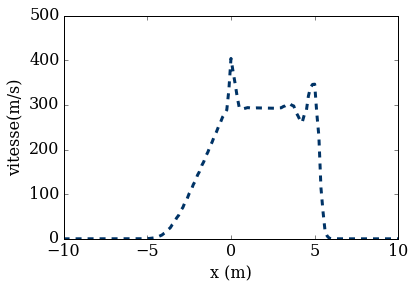

In [68]:
V=U[1,]/U[0,]
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,500)
pyplot.xlabel('x (m)', fontsize=16) 
pyplot.ylabel('vitesse(m/s)', fontsize=16) 

### Question 2

Quelle est la pression en x=2.5m?

On sait que: $$p = \frac{\mathbf{F_3}}{u} - \mathbf{U_3}$$

In [69]:
p=F[2,k]/u-U[2,k]
print(p,"N/m² est la pression à x=2.5m")

30250.8901676 N/m² est la pression à x=2.5m


On voit que la pression est assez élevée et rien qu'après 0.01 seconde, la pression dans la partie droite du tube est déjà beaucoup plus élevée. Celle-ci devrait tendre vers un équilibre dans l'entièreté du tube après un temps de relaxation qui n'a pas été calculé ici.

Après 0.01 seconde, nous obtenons le graphique suivant pour la pression en fonction de la position x:

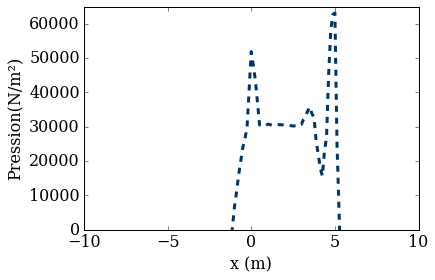

In [70]:
P=F[2,]/u-U[2,]
pyplot.plot(x, P, color='#003366', ls='--', lw=3)
pyplot.ylim(0,65000)
pyplot.xlabel('x (m)', fontsize=16)  
pyplot.ylabel('Pression(N/m²)', fontsize=16) 

La pression aux extrêmités est nulle, on suppose que le gaz a fusé vers la partie entre -1 et 5 dans le tube, provoquant une dépression à gauche.

### Question 3

Quelle est la densité en x=2.5m?

Simplement, la densité est donnée par: $$\rho = \mathbf{U_1}$$

Après 0.01 seconde, nous obtenons le graphique suivant pour la densité en fonction de la position x:

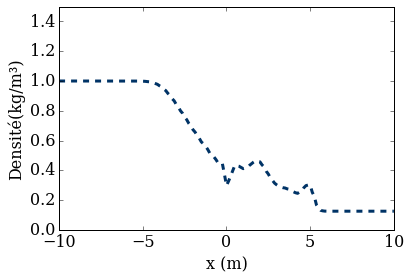

In [71]:
D=U[0,]
pyplot.plot(x, D, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1.5)
pyplot.xlabel('x (m)', fontsize=16)  
pyplot.ylabel('Densité(kg/m³)', fontsize=16) 

In [72]:
rho=U[0,k]
print(rho,"kg/m³ est la densité en x=2.5m")

0.374691402648 kg/m³ est la densité en x=2.5m


Toujours assez intuitivement, la densité a augmenté dans la partie droite du tube.

## Conclusion

L'algorithme de Richtmyer fonctionne donc assez bien pour nous fournir des données plausibles. Enfin, nous avons observé le comportement du Sod's shock tube.